# Проект: Принятие решений в бизнесе

# Описание проекта

## Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Описание данных

## Данные для первой части
- Файл [hypothesis.csv](datasets/hypothesis.csv). Скачать датасет
  - **Hypothesis** — краткое описание гипотезы;
  - **Reach** — охват пользователей по 10-балльной шкале;
  - **Impact** — влияние на пользователей по 10-балльной шкале;
  - **Confidence** — уверенность в гипотезе по 10-балльной шкале;
  - **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

## Данные для второй части
- Файл [orders.csv](datasets/orders.csv). Скачать датасет
  - **transactionId** — идентификатор заказа;
  - **visitorId** — идентификатор пользователя, совершившего заказ;
  - **date** — дата, когда был совершён заказ;
  - **revenue** — выручка заказа;
  - **group** — группа A/B-теста, в которую попал заказ.

- Файл [visitors.csv](datasets/visitors.csv). Скачать датасет
  - **date** — дата;
  - **group** — группа A/B-теста;
  - **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста.


# Основные этапы исследования:

### Шаг 1: Загрузка, изучение и предобработка данных

### Шаг 2: Приоритизация гипотез

В файле [hypothesis.csv](datasets/hypothesis.csv) 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

## Задачи
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.



### Шаг 3: Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах [orders.csv](datasets/orders.csv) и [visitors.csv](datasets/visitors.csv).

## Задачи
- Проанализируйте A/B-тест:
  - Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
  - Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
  - Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
  - Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
  - Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
  - Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
  - Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
  - Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
  - Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
  - Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
  - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
  - Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
  - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений:
  1. Остановить тест, зафиксировать победу одной из групп.
  2. Остановить тест, зафиксировать отсутствие различий между группами.
  3. Продолжить тест.

## Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import datetime as dt
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

# Шаг 1: Загрузка, изучение и предобработка данных

In [2]:
# Ссылки на файлы
hypothesis_url = "https://code.s3.yandex.net/datasets/hypothesis.csv"
orders_url = "https://code.s3.yandex.net/datasets/orders.csv"
visitors_url = "https://code.s3.yandex.net/datasets/visitors.csv"

# Инициализация переменных для DataFrame
hypothesis = None
orders = None
visitors = None

# Чтение файла hypothesis
try:
    hypothesis = pd.read_csv(hypothesis_url)
    print("hypothesis.csv успешно загружен.")
except Exception as e:
    print(f"Ошибка при загрузке hypothesis.csv: {e}")

# Чтение файла orders
try:
    orders = pd.read_csv(orders_url)
    print("orders.csv успешно загружен.")
except Exception as e:
    print(f"Ошибка при загрузке orders.csv: {e}")

# Чтение файла visitors
try:
    visitors = pd.read_csv(visitors_url)
    print("visitors.csv успешно загружен.")
except Exception as e:
    print(f"Ошибка при загрузке visitors.csv: {e}")

hypothesis.csv успешно загружен.
orders.csv успешно загружен.
visitors.csv успешно загружен.


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
print('Количество дубликатов: ', hypothesis.duplicated().sum())

Количество дубликатов:  0


В принципе здесь нет смысла проверять датафрейм на дубликаты, так как все данные представлены в численном значении. Данные изучены, датафрейм в порядке. В датафрейме 9 строк.

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
print('Количество дубликатов: ', orders.duplicated().sum())

Количество дубликатов:  0


In [9]:
try:
    orders['date'] = pd.to_datetime(orders['date'])
    print("Столбец 'date' успешно приведен к типу datetime.")
except Exception as e:
    print(f"Ошибка при приведении столбца 'date'")

Столбец 'date' успешно приведен к типу datetime.


Данные в датафрейме orders в порядке. Столбец 'date' приведен к типу datetime, дубликаты отсутствуют.

In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
print('Количество дубликатов: ', visitors.duplicated().sum())

Количество дубликатов:  0


In [13]:
try:
    visitors['date'] = pd.to_datetime(visitors['date'])
    print("Столбец 'date' успешно приведен к типу datetime.")
except Exception as e:
    print(f"Ошибка при приведении столбца 'date'")

Столбец 'date' успешно приведен к типу datetime.


<span style="color: blue;">Данные в датафрейме visitors в порядке. Столбец 'date' приведен к типу datetime, дубликаты отсутствуют.</span>

# Шаг 2: Приоритизация гипотез

# Применение фреймворка ICE для приоритизации гипотез

In [14]:
# Применение фреймворка ICE
hypothesis['ICE'] = ((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']).round(1)

# Сортировка по убыванию приоритета
ice_sorted = hypothesis.sort_values(by='ICE', ascending=False)
print("Приоритизация гипотез по фреймворку ICE:")
display(ice_sorted[['Hypothesis', 'ICE']])

Приоритизация гипотез по фреймворку ICE:


,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.2
0,"Добавить два новых канала привлечения трафика,...",13.3
7,Добавить форму подписки на все основные страни...,11.2
6,Показать на главной странице баннеры с актуаль...,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0
1,"Запустить собственную службу доставки, что сок...",2.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.3
3,"Изменить структура категорий, что увеличит кон...",1.1
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0


# Применение фреймворка RICE для приоритизации гипотез

In [15]:
hypothesis['RICE'] = ((hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'])

# Сортировка по убыванию приоритетаR
rice_sorted = hypothesis.sort_values(by='RICE', ascending=False)
print("Приоритизация гипотез по фреймворку RICE:")
display(rice_sorted[['Hypothesis', 'RICE']])

Приоритизация гипотез по фреймворку RICE:


,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


# Выводы по приоритизации гипотез

## Приоритизация по фреймворку ICE:
- **Топ-3 гипотезы:**
  - Запустить акцию, дающую скидку на товар в день (ICE = 16.2)
  - Добавить два новых канала привлечения трафика (ICE = 13.3)
  - Добавить форму подписки на все основные страницы (ICE = 11.2)
- **Низкие приоритеты:**
  - Изменить цвет фона главной страницы (ICE = 1.0)
  - Добавить страницу отзывов клиентов о магазине (ICE = 1.3)

## Приоритизация по фреймворку RICE:
- **Топ-3 гипотезы:**
  - Добавить форму подписки на все основные страницы (RICE = 112.0)
  - Добавить блоки рекомендаций товаров на сайт интернет-магазина (RICE = 56.0)
  - Добавить два новых канала привлечения трафика (RICE = 40.0)
- **Низкие приоритеты:**
  - Изменить цвет фона главной страницы (RICE = 3.0)
  - Запустить собственную службу доставки (RICE = 4.0)

## Сравнение результатов:
- **Изменение приоритетов:**
  - Гипотеза "Добавить форму подписки на все основные страницы" значительно поднялась в приоритете с ICE (11.2) до RICE (112.0), что указывает на важность охвата (Reach) в этой гипотезе.
  - Гипотеза "Запустить акцию, дающую скидку на товар в день покупки" сохранила высокий приоритет в ICE (16.2), но значительно опустилась в RICE (16.2), что говорит о том, что ее охват можетВот вывод, подготовленный для формата Markdown:
  


    
  # Шаг 3: Анализ A/B-теста

### Создадим таблицу cumulativeData куммулятивных данных по обеим таблицам.

In [16]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [17]:
# Получаем минимальные и максимальные даты из исходных данных
min_date_orders = orders['date'].min()
max_date_orders = orders['date'].max()
min_date_visitors = visitors['date'].min()
max_date_visitors = visitors['date'].max()

# Получаем минимальные и максимальные даты из датафрейма cumulativeData
min_date_cumulative = cumulativeData['date'].min()
max_date_cumulative = cumulativeData['date'].max()

# Проверяем соответствие дат
print("Минимальная дата в orders:", min_date_orders)
print("Максимальная дата в orders:", max_date_orders)
print("Минимальная дата в visitors:", min_date_visitors)
print("Максимальная дата в visitors:", max_date_visitors)

print("\nМинимальная дата в cumulativeData:", min_date_cumulative)
print("Максимальная дата в cumulativeData:", max_date_cumulative)

# Проверка на соответствие
if (min_date_orders == min_date_cumulative) and (max_date_orders == max_date_cumulative):
    print("\nМинимальная и максимальная даты в cumulativeData совпадают с датами в orders.")
else:
    print("\nМинимальная и максимальная даты в cumulativeData не совпадают с датами в orders.")

if (min_date_visitors == min_date_cumulative) and (max_date_visitors == max_date_cumulative):
    print("Минимальная и максимальная даты в cumulativeData совпадают с датами в visitors.")
else:
    print("Минимальная и максимальная даты в cumulativeData не совпадают с датами в visitors.")

Минимальная дата в orders: 2019-08-01 00:00:00
Максимальная дата в orders: 2019-08-31 00:00:00
Минимальная дата в visitors: 2019-08-01 00:00:00
Максимальная дата в visitors: 2019-08-31 00:00:00

Минимальная дата в cumulativeData: 2019-08-01 00:00:00
Максимальная дата в cumulativeData: 2019-08-31 00:00:00

Минимальная и максимальная даты в cumulativeData совпадают с датами в orders.
Минимальная и максимальная даты в cumulativeData совпадают с датами в visitors.


## Решение задач:

### 1. Построение графика кумулятивной выручки по группам.

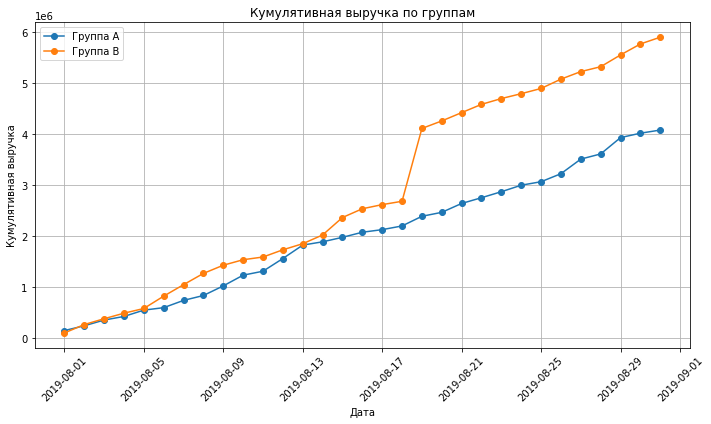

In [18]:
plt.figure(figsize=(10, 6))

for group in cumulativeData['group'].unique():
    group_data = cumulativeData[cumulativeData['group'] == group]
    plt.plot(group_data['date'], group_data['revenue'], label=f'Группа {group}', marker='o')

plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости
plt.tight_layout()  # Автоматическая подстройка графика
plt.show()

<span style="color: blue;">До 13 августа наблюдается приблизительно одинаковый рост выручки в обеих группах. Однако после 13 августа в группе B происходит более значительный рост, чем в группе A. Особенно заметен скачок выручки в группе B в районе 17 августа, после чего, графики обеих групп демонстрируют схожую тенденцию роста.</span>

<span style="color: blue;">В связи с этим, я считаю, что необходимо более детально изучить данные группы B, особенно в отношении количества и суммы заказов. Вероятно, в этих данных могут быть выбросы, которые влияют на результаты.</span>

In [19]:
# Фильтруем данные для группы B и нужных дат
group_b_data = cumulativeData[
    (cumulativeData['group'] == 'B') & 
    (cumulativeData['date'].isin(['2019-08-17', '2019-08-18', '2019-08-19', '2019-08-20', '2019-08-21']))
]

# Выводим количество заказов и сумму выручки
result = group_b_data[['date', 'orders', 'revenue']]
print(result)

         date  orders  revenue
33 2019-08-17     373  2620790
35 2019-08-18     382  2686621
37 2019-08-19     403  4116541
39 2019-08-20     423  4263815
41 2019-08-21     437  4426892


In [20]:
# Фильтруем данные для группы B и нужных дат
group_b_data = cumulativeData[
    (cumulativeData['group'] == 'A') & 
    (cumulativeData['date'].isin(['2019-08-17', '2019-08-18', '2019-08-19', '2019-08-20', '2019-08-21']))
]

# Выводим количество заказов и сумму выручки
result = group_b_data[['date', 'orders', 'revenue']]
print(result)

         date  orders  revenue
32 2019-08-17     311  2129769
34 2019-08-18     328  2202167
36 2019-08-19     350  2391910
38 2019-08-20     362  2469529
40 2019-08-21     385  2643838


<span style="color: blue;">Относительно заказов все выглядит нормально. В обеих группах идет равномерный рост. Однако выручка растет с 19 августа. Посмотрим, что там происходило.</span>

In [21]:
# Фильтруем данные для 19 августа
orders_aug19 = orders[orders['date'] == '2019-08-19']

# Получаем медианное значение выручки
median_revenue_aug19 = orders_aug19['revenue'].median()

# Фильтруем заказы для группы B
group_b_orders_aug19 = orders_aug19[orders_aug19['group'] == 'B']

# Сортируем заказы по выручке
top_5_orders = group_b_orders_aug19.sort_values(by='revenue', ascending=False).head(5)

# Печатаем результаты
print(f"Медианное значение выручки на 19 августа: {median_revenue_aug19}")
print("Топ-5 заказов в группе B на 19 августа по выручке:")
display(top_5_orders[['transactionId', 'visitorId', 'date', 'revenue', 'group']])

Медианное значение выручки на 19 августа: 2630.0
Топ-5 заказов в группе B на 19 августа по выручке:


,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
527,1570513684,2837914161,2019-08-19,33405,B
461,2683113224,154576532,2019-08-19,26550,B
368,3268879337,2536252163,2019-08-19,20026,B
463,4170537404,290022471,2019-08-19,16480,B


<span style="color: blue;">19 августа был зафиксирован крупный заказ на сумму 1,294,500 рублей. В то же время, медианное значение выручки за этот день составило 2,630 рублей.</span>

<span style="color: blue;">Суммарная выручка за 19 августа достигла 4,116,541 рублей, и данный крупный заказ составляет 31.44% от общей выручки за день. </span>

<span style="color: blue;">Остальные заказы варьировались в пределах 30,000 - 40,000 рублей, что позволяет рассматривать этот крупный заказ как выброс в дальнейшем исследовании.</span>

In [22]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


### 2. График кумулятивного среднего чека по группам.

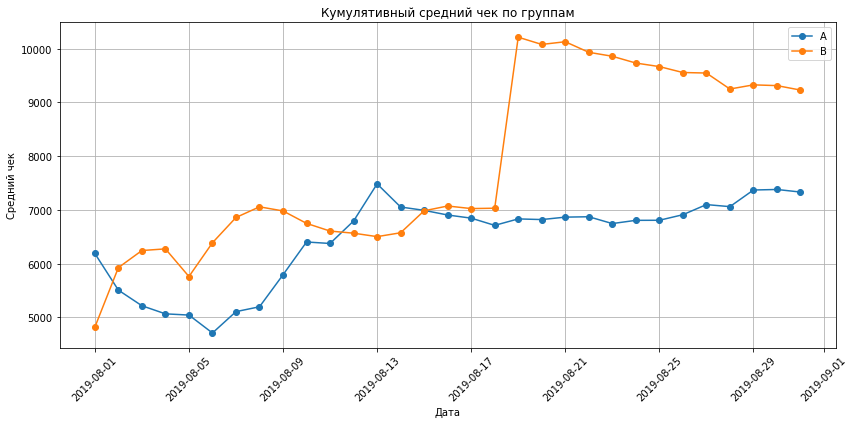

In [23]:
# Рассчитываем кумулятивный средний чек
cumulativeData['average_check'] = cumulativeData['revenue'] / cumulativeData['orders']

# Строим график
plt.figure(figsize=(12, 6))
for group in cumulativeData['group'].unique():
    group_data = cumulativeData[cumulativeData['group'] == group]
    plt.plot(group_data['date'], group_data['average_check'], label=group, marker='o')

plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="color: blue;">Со 2 по 11 августа средний чек был больше у группы В, затем с 11 по 15 в группе А средний чек выше. 19 августа в группе В происходит рост среднего чека, это связано с крупным заказом, который мы нашли в предыдущем разделе. Однако мы наблюдаем, что после 19 августа у группы А просиходит планомерный рост чека, а у группы В снижение среднего чека.</span>

### 3.График относительного изменения кумулятивного среднего чека группы B к группе A

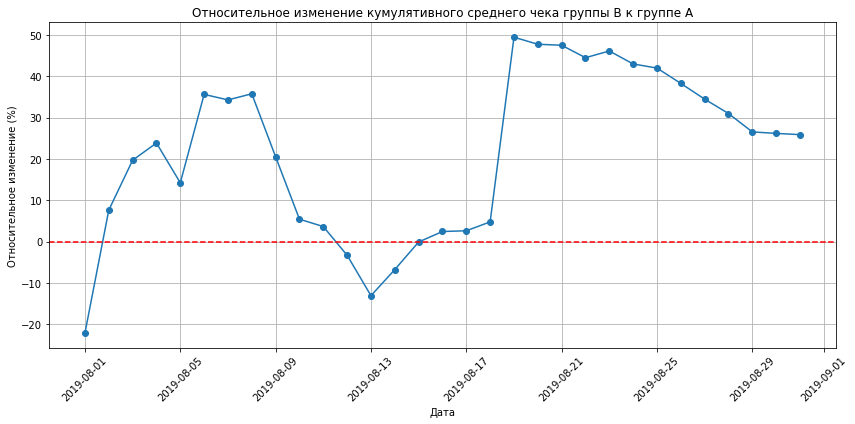

In [24]:
group_a = cumulativeData[cumulativeData['group'] == 'A']
group_b = cumulativeData[cumulativeData['group'] == 'B']

# Объединяем данные по дате для удобства
merged_data = group_a[['date', 'average_check']].merge(
    group_b[['date', 'average_check']],
    on='date',
    suffixes=('_A', '_B')
)

# Рассчитываем относительное изменение кумулятивного среднего чека группы B к группе A
merged_data['relative_change'] = (merged_data['average_check_B'] - merged_data['average_check_A']) / merged_data['average_check_A'] * 100

# Строим график
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['relative_change'], marker='o')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение (%)')
plt.axhline(0, color='red', linestyle='--')  # Линия на уровне 0
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="color: blue;">Прежде чем сделать выводы о данном графике, отметим, что он является продолжением предыдущего графика и задачи. </span>

<span style="color: blue;">До 8 августа наблюдался рост среднего чека группы B относительно группы A. Однако с 8 по 13 августа тренд изменился в пользу группы A. </span>

<span style="color: blue;">Как и в прошлом графике, мы видим рост кумулятивного среднего чека группы B по сравнению с группой A до 19 августа. Особенно заметен рост именно 19 августа, когда был зафиксирован крупный заказ на сумму 1,3 миллиона рублей. </span>

<span style="color: blue;">Тем не менее, после 19 августа тренд снова изменился в пользу группы A.</span>

<span style="color: blue;"></span>

### 4.График кумулятивного среднего количества заказов на посетителя по группам

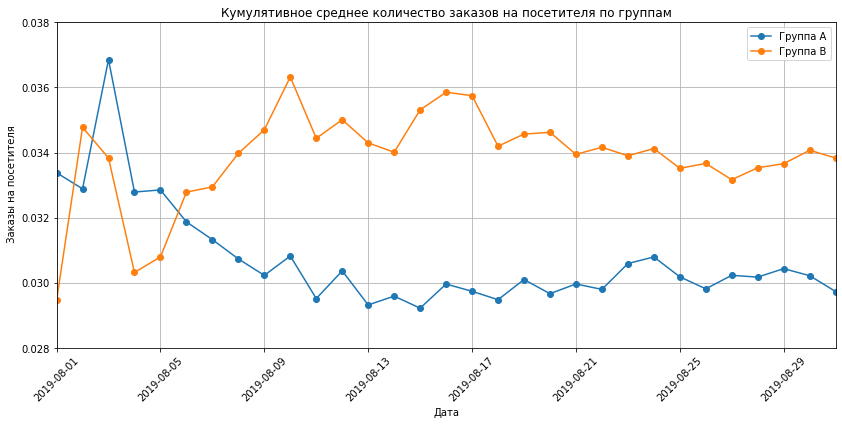

In [25]:
# Рассчитываем кумулятивное среднее количество заказов на посетителя
cumulativeData['orders_per_visitor'] = cumulativeData['orders'] / cumulativeData['visitors']

# Разделяем данные на группы A и B
group_a = cumulativeData[cumulativeData['group'] == 'A']
group_b = cumulativeData[cumulativeData['group'] == 'B']




# Объединяем данные по дате для удобства
merged_data = group_a[['date', 'orders_per_visitor']].merge(
    group_b[['date', 'orders_per_visitor']],
    on='date',
    suffixes=('_A', '_B')
)

# Строим график кумулятивного среднего количества заказов на посетителя
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['orders_per_visitor_A'], marker='o', label='Группа A')
plt.plot(merged_data['date'], merged_data['orders_per_visitor_B'], marker='o', label='Группа B')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel(' Заказы на посетителя')
plt.axhline(0, color='red', linestyle='--')  # Линия на уровне 0
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.axis(["2019-08-01", '2019-08-31', 0.028, 0.038])
plt.show()

<span style="color: blue;">На данном графике с 1 по 5 августа преимущество показателя кумулятивного среднего количества заказов было за группой А, однако с 6 по 9 августа у группы В наблюдается рост кумулятивного среднего количества заказов, а у группы А наоборот снижение. В дальнейшем значительных изменений у обеих групп на наблюдалось, которое бы позволило изменить общую картину на графике. Отмечу снижение кумулятивного среднего количества заказов у группы В после 16 августа, а у группы А повышение после 15 августа, но как я и говорил ранее эти изменения не позволили кардинально изменить общую тенденцию и сменить лидера по данному показателю. Думаю следующий график об относительном изменении показателя кумулятивного среднего количества заказов группы В к группе А.</span>
<span style="color: blue;"></span>

### 5. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

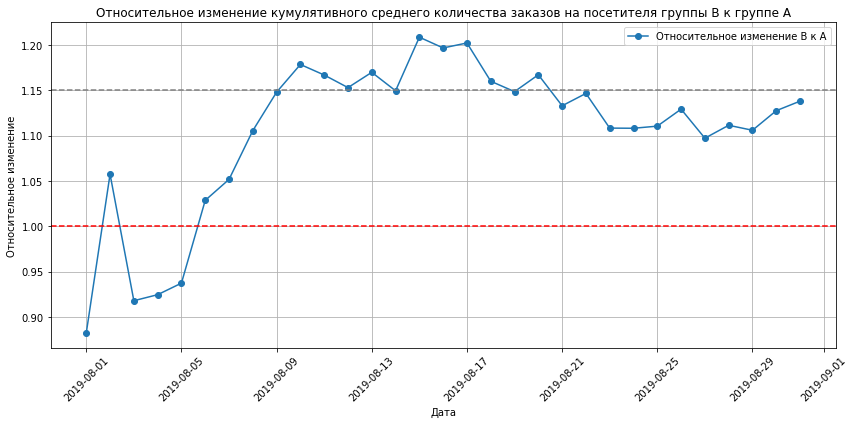

In [26]:
merged_data['relative_change'] = merged_data['orders_per_visitor_B'] / merged_data['orders_per_visitor_A']

plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['relative_change'], marker='o', label='Относительное изменение B к A')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.axhline(1, color='red', linestyle='--')  # Линия на уровне 1 (без изменений)
plt.axhline(1.15, color='grey', linestyle='--')
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<span style="color: blue;">Как и ранее утверждалось, что лидерство с 1 по 5 августа по кумулятивному среднему количеству заказов было у группы А. В дальнейшем преимущество было у группы В вплоть до сентября. Стоит отметить, что как и ранее утверждалось с 15 августа у группы В дела шли немного хуче нежели, чем у группы А, однако это не повлияло на то, чтобы дела группа А взяла лидерство относительно группы В. Хотя после 27 августа наблюдается небольшая смена тренда в пользу группы В, но так как он небольшой сложно сделать какой-то вывод. Интересно как пошли дела в сентябре?</span>

### 6. Точечный график количества заказов по пользователям.

In [27]:
# Создаем DataFrame с количеством заказов на каждого пользователя
orders_per_visitor = orders.groupby('visitorId').agg(
    orders=('transactionId', 'nunique')  # Подсчитываем уникальные идентификаторы заказов
).reset_index()

# Выводим результат
orders_per_visitor.sort_values(by='orders',ascending=False).head()

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


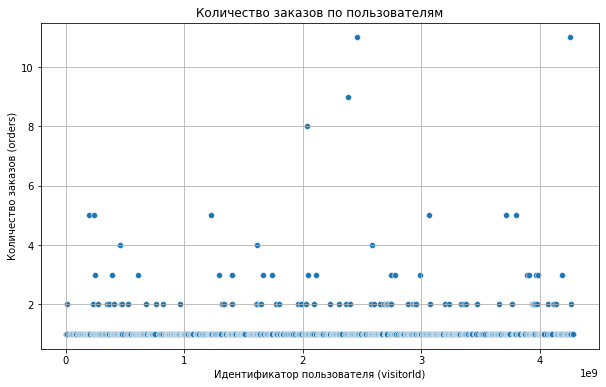

In [28]:
plt.figure(figsize=(10, 6))

# Создаем точечный график
sns.scatterplot(data=orders_per_visitor, x='visitorId', y='orders')

# Добавляем заголовок и метки осей
plt.title('Количество заказов по пользователям')
plt.xlabel('Идентификатор пользователя (visitorId)')
plt.ylabel('Количество заказов (orders)')

# Отображаем график
plt.grid()
plt.show()

<span style="color: blue;">Основная масса пользователей делает 1-2 заказа. Выборка пользователей сделавших 3 и более заказа крайне мала относительно общей массы.</span>

### 7. Расчет 95-го и 99-го перцентиля количества заказов на пользователя.

In [29]:
# Вычисляем 95-й и 99-й перцентили
percentile_95 = orders_per_visitor['orders'].quantile(0.95)
percentile_99 = orders_per_visitor['orders'].quantile(0.99)

# Выводим результаты
print(f"95-й перцентиль количества заказов: {percentile_95}")
print(f"99-й перцентиль количества заказов: {percentile_99}")

95-й перцентиль количества заказов: 2.0
99-й перцентиль количества заказов: 4.0


<span style="color: blue;">Как и ранее утверждали, все что выше 2 заказов считаем аномалией.</span>

### 8. Точечный график стоимостей заказов.

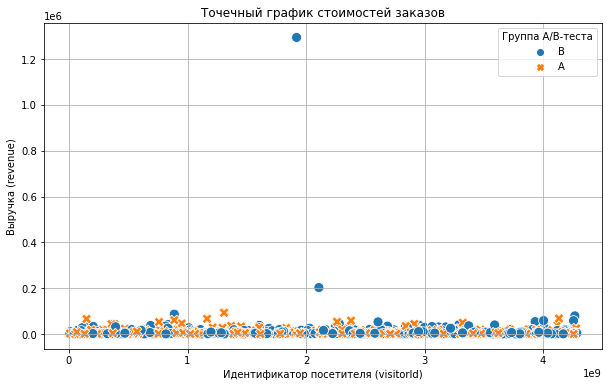

In [30]:
# Построение точечного графика
plt.figure(figsize=(10, 6))
sns.scatterplot(data=orders, x='visitorId', y='revenue', hue='group', style='group', s=100)

# Настройка графика
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Идентификатор посетителя (visitorId)')
plt.ylabel('Выручка (revenue)')
plt.legend(title='Группа A/B-теста')
plt.grid(True)

# Показать график
plt.show()

<span style="color: blue;">На графике наблюдаются только два заказа дороже 100000 рублей все остальные меньше.</span>

<span style="color: blue;">Давайте попробуем отфильтровать их и построить графики без них.</span>



In [31]:
# Фильтрация заказов стоимостью больше 100000 рублей
high_value_orders = orders[orders['revenue'] > 100000]

# Показать отфильтрованные заказы
display(high_value_orders)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B


<span style="color: blue;">Всего лишь 2 заказа выше 100000 рублей.</span>

In [32]:
# Фильтрация заказов стоимостью меньше 100000 рублей
low_value_orders = orders[orders['revenue'] < 100000]

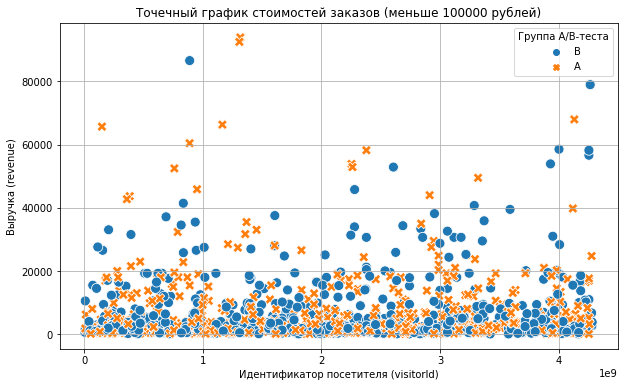

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=low_value_orders, x='visitorId', y='revenue', hue='group', style='group', s=100)

# Настройка графика
plt.title('Точечный график стоимостей заказов (меньше 100000 рублей)')
plt.xlabel('Идентификатор посетителя (visitorId)')
plt.ylabel('Выручка (revenue)')
plt.legend(title='Группа A/B-теста')
plt.grid(True)

# Показать график
plt.show()

<span style="color: blue;">Этот график более репрезентативный нежели предыдущий. Давайте найдем перцентили для определения точного размера стоимости аномального заказа.</span>

### 9. Расчет 95-го и 99-го перцентиля стоимости заказов.

In [34]:
# Рассчитываем 95-й и 99-й перцентили стоимости заказов
percentile_95 = orders['revenue'].quantile(0.95).round(1)
percentile_99 = orders['revenue'].quantile(0.99).round(1)

print(f"95-й перцентиль: {percentile_95} рублей")
print(f"99-й перцентиль: {percentile_99} рублей")

95-й перцентиль: 28000.0 рублей
99-й перцентиль: 58233.2 рублей


Все что выше 99-го перцентиля принимаем за аномалию.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

#### Для начала соберем все данные в одну таблицу, в том числе кумулятивные показатели.

In [35]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [36]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

#### Теперь объединим все в одну таблицу.

In [37]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.sample(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
26,2019-08-27,28,286780,16,147677,495,3514698,548,5232260,711,720,16376,16523
23,2019-08-24,15,127703,16,95506,441,3002070,493,4798722,395,378,14322,14448
18,2019-08-19,22,189743,21,1429920,350,2391910,403,4116541,502,487,11629,11658
24,2019-08-25,10,68634,14,102862,451,3070704,507,4901584,621,679,14943,15127
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935


#### Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

#### Напомним, что в sampleA сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём среднее группы B: SampleB.mean().

#### Выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1.  Округлим до трёх знаков после запятой.

#### За нулевую гипотезу возьмём что: "статистически значимых различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия в среднем количестве заказов на посетителя между группами по «сырым» данным есть.

In [38]:
ordersByVisitorsA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByVisitorsA.columns = ['visitorId', 'orders']

ordersByVisitorsB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByVisitorsB.columns = ['visitorId', 'orders']

In [39]:
# Получаем данные для групп A и B
revenueA = orders[orders['group'] == 'A']['revenue']
revenueB = orders[orders['group'] == 'B']['revenue']

sampleA = pd.concat([ordersByVisitorsA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByVisitorsA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByVisitorsB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByVisitorsB['orders'])), name='orders')],axis=0)

print("Уровень значимости alpha принят:",0.05)
print("P-value составляет: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный показатель B к А сотсавляет: {0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))


Уровень значимости alpha принят: 0.05
P-value составляет: 0.017
Относительный показатель B к А сотсавляет: 0.138


<span style="color: blue;">P-value ниже уровня значимости, это означает, что нулевая гипотеза о том, что: "статистически значимых различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет" отвергнута. Различие в среднем количестве заказов на посетителя между группами по «сырым» данным есть и составляет 13,8% в группе В относительно группы А.</span>

### 11. Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

#### Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 
#### - Нулевая гипотеза: различий в среднем чеке между группами нет.
#### - Альтернативная гипотеза: различия в среднем чеке между группами есть. 

#### Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 

#### А ещё найдём относительные различия в среднем чеке между группами:

In [40]:
print("Уровень значимости alpha принят:",0.05)
print('Р-value составляет: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный показатель B к А сотсавляет: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Уровень значимости alpha принят: 0.05
Р-value составляет: 0.729
Относительный показатель B к А сотсавляет: 0.259


<span style="color: blue;">P-value значительно превысил уровень значимости, а это означает, что нет причин отвергать нулевую гипотезу о том, что есть различия в среднем чеке между сегментами. Согласно данному тесту можно заявить, что различия в среднем чеке в обеих группах по "сырым" данным нет. Однако различие среднего чека в группе B относительно группы А составляет 25,9%</span>

### 12. Различие в среднем количестве заказов на посетителя между группами по «очищенным» данным

#### Примем за аномальных пользователей тех, кто совершил более 2 заказов или совершил заказ дороже 58233.2 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 58233.2 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

#### Узнаем, сколько всего аномальных пользователей.

In [41]:
usersWithManyOrders = pd.concat(
    [
        ordersByVisitorsA[ordersByVisitorsA['orders'] > percentile_95]['visitorId'],
        ordersByVisitorsB[ordersByVisitorsB['orders'] > percentile_95]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > percentile_99]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print("Количество пользователей, которые оказались в зоне выброса:" ,len(abnormalUsers)) 

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64
Количество пользователей, которые оказались в зоне выброса: 11


#### Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

#### Применим статистический критерий Манна-Уитни к полученным выборкам:

### За нулевую гипотезу возьмём что: "статистически значимых различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [42]:
sampleAFiltered = pd.concat(
    [
        ordersByVisitorsA[
            np.logical_not(ordersByVisitorsA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByVisitorsA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByVisitorsB[
            np.logical_not(ordersByVisitorsB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByVisitorsB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print("Уровень значимости alpha принят:",0.05)
print('P-value составляет: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный показатель B к А сотсавляет: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Уровень значимости alpha принят: 0.05
P-value составляет: 0.015
Относительный показатель B к А сотсавляет: 0.142


<span style="color: blue;">P-value уменьшился и по прежнему остался ниже уровня значимости, что позволяет как и прежде утверждать то, что различие в среднем количестве заказов в группах В и А есть и в "очищенных" данных. В "очищенных" данных наблюдаем рост относительного показателя конверсии В к А (17,4%) в сравнении к "сырым" данным (13,8%)</span>

<span style="color: blue;">Так как p-value меньше уровня значимости alpha, то мы отвергаем нулевую гипотезу и это означает, что различия есть.</span>

### 13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

#### - Нулевая гипотеза: различий в среднем чеке между группами нет.
#### - Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [43]:
print("Уровень значимости alpha принят:",0.05)
print(
    'P-value составляет: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный показатель B к А сотсавляет: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Уровень значимости alpha принят: 0.05
P-value составляет: 0.599
Относительный показатель B к А сотсавляет: 0.020


<span style="color: blue;">P-value как и в "сырых" данных выше уровня значимости, поэтому нет оснований отвергать гипотезу о том, что есть различия в среднем чеке между сегментами. Интересно то, что относительный показатель среднего чека группы В к А стал отрицательным. Это значит, что относительный показатель среднего чека группы А выше, чем у группы В на 2%, а в "сырых" данных преимущество было у группы В и составляло 26%. Я думаю такое значительное изменение данного показателя произошло за счет того, что мы удалили те самые 2 крупных заказа на 1,3 млн. рублей и 202 тысячи рублей.</span>

#### <span style="color: blue;">Согласно полученным результатам мы принимаем нулевую гипотезу и это означает, что статистической значимости различия средних чеков между группами нет.</span>

# Вывод по результатам теста.

## Результаты тестирования

Перед тем как принять решение о завершении теста, давайте рассмотрим полученные результаты.

### Конверсия
По "сырым" и "очищенным" данным группа В демонстрирует преимущество над группой А, составившее 13,8% и 17,4% соответственно.

### Средний чек
По "сырым" данным группа В также имеет преимущество относительно группы А на уровне 25,9%. Этот результат может показаться впечатляющим, однако после очистки данных, в ходе которой были исключены два крупных заказа, признанных аномалиями (на 1,294,500 рублей и 202,740 рублей), ситуация изменилась. После очистки данных преимущество, хоть и небольшое, оказалось у группы А относительно группы В — всего 2%. Это свидетельствует о том, что после очистки данные по средним чекам у обеих групп сравнялись.

### Вывод
Таким образом, можно констатировать победу группы В над группой А. Несмотря на то, что показатели по среднему чеку приблизительно равны, группа В явно выигрывает по конверсии на заказ, что подчеркивает ее эффективность.